In [2]:
import os 
import shutil
import random as rnd

# import relevant libraries
import trax
import trax.fastmath.numpy as np
from trax import layers as tl
from trax import fastmath

# import Layer from the utils.py file
from w1_utils import Layer, load_tweets, process_tweet
import w1_unittest

2022-08-30 21:48:29.302303: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/moidhassan/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/moidhassan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Create an array using trax.fastmath.numpy
a = np.array(5.0)

# View the returned array
display(a)

print(type(a))

DeviceArray(5., dtype=float32)

<class 'jaxlib.xla_extension.DeviceArray'>


In [4]:
# Define a function that will use the trax.fastmath.numpy array
def f(x):
    
    # f = x^2
    return (x**2)

In [5]:
# Call the function
print(f"f(a) for a={a} is {f(a)}")

f(a) for a=5.0 is 25.0


In [6]:
# Directly use trax.fastmath.grad to calculate the gradient (derivative) of the function
grad_f = trax.fastmath.grad(fun=f)  # df / dx - Gradient of function f(x) with respect to x

# View the type of the retuned object (it's a function)
print(type(grad_f))

print(grad_f)

<class 'function'>
<function f at 0x7f216f0745f0>


In [7]:
# Call the newly created function and pass in a value for x (the DeviceArray stored in 'a')
grad_calculation = grad_f(a)

# View the result of calling the grad_f function
display(grad_calculation)

DeviceArray(10., dtype=float32)

In [8]:
## DO NOT EDIT THIS CELL

# Import functions from the utils.py file

def train_val_split():
    # Load positive and negative tweets
    all_positive_tweets, all_negative_tweets = load_tweets()

    # View the total number of positive and negative tweets.
    print(f"The number of positive tweets: {len(all_positive_tweets)}")
    print(f"The number of negative tweets: {len(all_negative_tweets)}")

    # Split positive set into validation and training
    val_pos   = all_positive_tweets[4000:] # generating validation set for positive tweets
    train_pos  = all_positive_tweets[:4000]# generating training set for positive tweets

    # Split negative set into validation and training
    val_neg   = all_negative_tweets[4000:] # generating validation set for negative tweets
    train_neg  = all_negative_tweets[:4000] # generating training set for nagative tweets
    
    # Combine training data into one set
    train_x = train_pos + train_neg 

    # Combine validation data into one set
    val_x  = val_pos + val_neg

    # Set the labels for the training set (1 for positive, 0 for negative)
    train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))

    # Set the labels for the validation set (1 for positive, 0 for negative)
    val_y  = np.append(np.ones(len(val_pos)), np.zeros(len(val_neg)))


    return train_pos, train_neg, train_x, train_y, val_pos, val_neg, val_x, val_y

In [9]:
train_pos, train_neg, train_x, train_y, val_pos, val_neg, val_x, val_y = train_val_split()

print(f"length of train_x {len(train_x)}")
print(f"length of val_x {len(val_x)}")

The number of positive tweets: 5000
The number of negative tweets: 5000
length of train_x 8000
length of val_x 2000


In [10]:
# Try out function that processes tweets
print("original tweet at training position 0")
print(train_pos[0])

print("Tweet at training position 0 after processing:")
process_tweet(train_pos[0])

original tweet at training position 0
#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Tweet at training position 0 after processing:


['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']

In [11]:
# Build the vocabulary
# Unit Test Note - There is no test set here only train/val
def get_vocab(train_x):

    # Include special tokens 
    # started with pad, end of line and unk tokens
    Vocab = {'__PAD__': 0, '__</e>__': 1, '__UNK__': 2} 

    # Note that we build vocab using training data
    for tweet in train_x: 
        processed_tweet = process_tweet(tweet)
        for word in processed_tweet:
            if word not in Vocab: 
                Vocab[word] = len(Vocab)
    
    return Vocab

Vocab = get_vocab(train_x)

print("Total words in vocab are",len(Vocab))
display(Vocab)

Total words in vocab are 9088


{'__PAD__': 0,
 '__</e>__': 1,
 '__UNK__': 2,
 'followfriday': 3,
 'top': 4,
 'engag': 5,
 'member': 6,
 'commun': 7,
 'week': 8,
 ':)': 9,
 'hey': 10,
 'jame': 11,
 'odd': 12,
 ':/': 13,
 'pleas': 14,
 'call': 15,
 'contact': 16,
 'centr': 17,
 '02392441234': 18,
 'abl': 19,
 'assist': 20,
 'mani': 21,
 'thank': 22,
 'listen': 23,
 'last': 24,
 'night': 25,
 'bleed': 26,
 'amaz': 27,
 'track': 28,
 'scotland': 29,
 'congrat': 30,
 'yeaaah': 31,
 'yipppi': 32,
 'accnt': 33,
 'verifi': 34,
 'rqst': 35,
 'succeed': 36,
 'got': 37,
 'blue': 38,
 'tick': 39,
 'mark': 40,
 'fb': 41,
 'profil': 42,
 '15': 43,
 'day': 44,
 'one': 45,
 'irresist': 46,
 'flipkartfashionfriday': 47,
 'like': 48,
 'keep': 49,
 'love': 50,
 'custom': 51,
 'wait': 52,
 'long': 53,
 'hope': 54,
 'enjoy': 55,
 'happi': 56,
 'friday': 57,
 'lwwf': 58,
 'second': 59,
 'thought': 60,
 '’': 61,
 'enough': 62,
 'time': 63,
 'dd': 64,
 'new': 65,
 'short': 66,
 'enter': 67,
 'system': 68,
 'sheep': 69,
 'must': 70,
 'buy':

In [12]:
# CANDIDATE FOR TABLE TEST - If a student forgets to check for unk, there might be errors or just wrong values in the list.
# We can add those errors to check in autograder through tabled test or here student facing user test.

# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT) 
# GRADED FUNCTION: tweet_to_tensor
def tweet_to_tensor(tweet, vocab_dict, unk_token='__UNK__', verbose=False):
    '''
    Input: 
        tweet - A string containing a tweet
        vocab_dict - The words dictionary
        unk_token - The special string for unknown tokens
        verbose - Print info durign runtime
    Output:
        tensor_l - A python list with
        
    '''     
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    # Process the tweet into a list of words
    # where only important words are kept (stop words removed)
    word_l = process_tweet(tweet)
    
    if verbose:
        print("List of words from the processed tweet:")
        print(word_l)
        
    # Initialize the list that will contain the unique integer IDs of each word
    tensor_l = [] 
    
    # Get the unique integer ID of the __UNK__ token
    # GRADING NOTE: require the use of the variable, don't give credit for hard coding `2` as the unkown ID    

    unk_ID = vocab_dict[unk_token]
    
    if verbose:
        print(f"The unique integer ID for the unk_token is {unk_ID}")
        
    # for each word in the list:
    for word in word_l:
        
        # Get the unique integer ID.
        # If the word doesn't exist in the vocab dictionary,
        # use the unique ID for __UNK__ instead.
        word_ID = vocab_dict.get(word,unk_ID)
    
        # Append the unique integer ID to the tensor list.
        tensor_l.append(word_ID)
    ### END CODE HERE ###

    return tensor_l

In [13]:
print("Actual tweet is\n", val_pos[0])
print("\nTensor of tweet:\n", tweet_to_tensor(val_pos[0], vocab_dict=Vocab))

Actual tweet is
 Bro:U wan cut hair anot,ur hair long Liao bo
Me:since ord liao,take it easy lor treat as save $ leave it longer :)
Bro:LOL Sibei xialan

Tensor of tweet:
 [1065, 136, 479, 2351, 745, 8148, 1123, 745, 53, 2, 2672, 791, 2, 2, 349, 601, 2, 3489, 1017, 597, 4559, 9, 1065, 157, 2, 2]


In [14]:
# Test your function
w1_unittest.test_tweet_to_tensor(tweet_to_tensor, Vocab)

 All tests passed


In [15]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED: Data generator
def data_generator(data_pos, data_neg, batch_size, loop, vocab_dict, shuffle=False):
    '''
    Input: 
        data_pos - Set of positive examples
        data_neg - Set of negative examples
        batch_size - number of samples per batch. Must be even
        loop - True or False
        vocab_dict - The words dictionary
        shuffle - Shuffle the data order
    Yield:
        inputs - Subset of positive and negative examples
        targets - The corresponding labels for the subset
        example_weights - An array specifying the importance of each example
        
    '''     

    # make sure the batch size is an even number
    # to allow an equal number of positive and negative samples    
    assert batch_size % 2 == 0
    
    # Number of positive examples in each batch is half of the batch size
    # same with number of negative examples in each batch
    n_to_take = batch_size // 2
    
    # Use pos_index to walk through the data_pos array
    # same with neg_index and data_neg
    pos_index = 0
    neg_index = 0
    
    len_data_pos = len(data_pos)
    len_data_neg = len(data_neg)
    
    # Get and array with the data indexes
    pos_index_lines = list(range(len_data_pos))
    neg_index_lines = list(range(len_data_neg))
    
    # shuffle lines if shuffle is set to True
    if shuffle:
        rnd.shuffle(pos_index_lines)
        rnd.shuffle(neg_index_lines)
        
    stop = False
    
    # Loop indefinitely
    while not stop:  
        
        # create a batch with positive and negative examples
        batch = []
        
        # First part: Pack n_to_take positive examples
        
        # Start from 0 and increment i up to n_to_take
        for i in range(n_to_take):
                    
            # If the positive index goes past the positive dataset,
            if pos_index >= len_data_pos: 
                
                # If loop is set to False, break once we reach the end of the dataset
                if not loop:
                    stop = True;
                    break;
                # If user wants to keep re-using the data, reset the index
                pos_index = 0
                if shuffle:
                    # Shuffle the index of the positive sample
                    rnd.shuffle(pos_index_lines)
                    
            # get the tweet as pos_index
            tweet = data_pos[pos_index_lines[pos_index]]
            
            # convert the tweet into tensors of integers representing the processed words
            tensor = tweet_to_tensor(tweet, vocab_dict)
            
            # append the tensor to the batch list
            batch.append(tensor)
            
            # Increment pos_index by one
            pos_index = pos_index + 1


            
        ### START CODE HERE (Replace instances of 'None' with your code) ###

        # Second part: Pack n_to_take negative examples

        # Using the same batch list, start from 0 and increment i up to n_to_take
        for i in range(n_to_take):
            
            # If the negative index goes past the negative dataset,
            if neg_index >= len_data_neg:
                
                # If loop is set to False, break once we reach the end of the dataset
                if not loop:
                    stop = True 
                    break 
                    
                # If user wants to keep re-using the data, reset the index
                neg_index = 0
                
                if shuffle:
                    # Shuffle the index of the negative sample
                    rnd.shuffle(neg_index_lines)
                    
            # get the tweet as neg_index
            tweet = data_neg[neg_index_lines[neg_index]]
            
            # convert the tweet into tensors of integers representing the processed words
            tensor = tweet_to_tensor(tweet, vocab_dict)
            
            # append the tensor to the batch list
            batch.append(tensor)
            
            # Increment neg_index by one
            neg_index = neg_index + 1

        ### END CODE HERE ###        

        if stop:
            break;

        # Update the start index for positive data 
        # so that it's n_to_take positions after the current pos_index
        pos_index += n_to_take
        
        # Update the start index for negative data 
        # so that it's n_to_take positions after the current neg_index
        neg_index += n_to_take
        
        # Get the max tweet length (the length of the longest tweet) 
        # (you will pad all shorter tweets to have this length)
        max_len = max([len(t) for t in batch]) 
        
        
        # Initialize the input_l, which will 
        # store the padded versions of the tensors
        tensor_pad_l = []
        # Pad shorter tweets with zeros
        for tensor in batch:


        ### START CODE HERE (Replace instances of 'None' with your code) ###
            # Get the number of positions to pad for this tensor so that it will be max_len long
            n_pad = max_len - len(tensor)
            
            # Generate a list of zeros, with length n_pad
            pad_l = [0] * n_pad
            
            # concatenate the tensor and the list of padded zeros
            tensor_pad = tensor + pad_l
            
            # append the padded tensor to the list of padded tensors
            tensor_pad_l.append(tensor_pad)

        # convert the list of padded tensors to a numpy array
        # and store this as the model inputs
        inputs = np.array(tensor_pad_l)
  
        # Generate the list of targets for the positive examples (a list of ones)
        # The length is the number of positive examples in the batch
        target_pos = [1] * n_to_take
        
        # Generate the list of targets for the negative examples (a list of zeros)
        # The length is the number of negative examples in the batch
        target_neg = [0] * n_to_take
        
        # Concatenate the positve and negative targets
        target_l = target_pos + target_neg
        
        # Convert the target list into a numpy array
        targets = np.array(target_l)

        # Example weights: Treat all examples equally importantly.
        example_weights = np.array([1] * len(targets))
        

        ### END CODE HERE ###

        # note we use yield and not return
        yield inputs, targets, example_weights

In [16]:
# Set the random number generator for the shuffle procedure
rnd.seed(30) 

# Create the training data generator

def train_generator(batch_size, train_pos
                    , train_neg, vocab_dict, loop=True
                    , shuffle = False):
    return data_generator(train_pos, train_neg, batch_size, loop, vocab_dict, shuffle)

# Create the validation data generator
def val_generator(batch_size, val_pos
                    , val_neg, vocab_dict, loop=True
                    , shuffle = False):
    return data_generator(val_pos, val_neg, batch_size, loop, vocab_dict, shuffle)

# Create the validation data generator
def test_generator(batch_size, val_pos
                    , val_neg, vocab_dict, loop=False
                    , shuffle = False):
    return data_generator(val_pos, val_neg, batch_size, loop, vocab_dict, shuffle)

# Get a batch from the train_generator and inspect.
inputs, targets, example_weights = next(train_generator(4, train_pos, train_neg, Vocab, shuffle=True))

# this will print a list of 4 tensors padded with zeros
print(f'Inputs: {inputs}')
print(f'Targets: {targets}')
print(f'Example Weights: {example_weights}')

Inputs: [[2005 4451 3201    9    0    0    0    0    0    0    0]
 [4954  567 2000 1454 5174 3499  141 3499  130  459    9]
 [3761  109  136  583 2930 3969    0    0    0    0    0]
 [ 250 3761    0    0    0    0    0    0    0    0    0]]
Targets: [1 1 0 0]
Example Weights: [1 1 1 1]


In [17]:
# Test the train_generator

# Create a data generator for training data,
# which produces batches of size 4 (for tensors and their respective targets)
tmp_data_gen = train_generator(batch_size = 4, train_pos=train_pos, train_neg=train_neg, vocab_dict=Vocab)

# Call the data generator to get one batch and its targets
tmp_inputs, tmp_targets, tmp_example_weights = next(tmp_data_gen)

print(f"The inputs shape is {tmp_inputs.shape}")
for i,t in enumerate(tmp_inputs):
    print(f"input tensor: {t}; target {tmp_targets[i]}; example weights {tmp_example_weights[i]}")

The inputs shape is (4, 14)
input tensor: [3 4 5 6 7 8 9 0 0 0 0 0 0 0]; target 1; example weights 1
input tensor: [10 11 12 13 14 15 16 17 18 19 20  9 21 22]; target 1; example weights 1
input tensor: [5738 2901 3761    0    0    0    0    0    0    0    0    0    0    0]; target 0; example weights 1
input tensor: [ 858  256 3652 5739  307 4458  567 1230 2767  328 1202 3761    0    0]; target 0; example weights 1


In [18]:
# Test your function
w1_unittest.test_data_generator(data_generator(data_pos=train_pos, data_neg=train_neg, batch_size=4, loop=True, vocab_dict=Vocab, shuffle = False))

 All tests passed


In [19]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: Relu
class Relu(Layer):
    """Relu activation function implementation"""
    def forward(self, x):
        '''
        Input: 
            - x (a numpy array): the input
        Output:
            - activation (numpy array): all positive or 0 version of x
        '''
        ### START CODE HERE (Replace instances of 'None' with your code) ###
        
        activation = np.maximum(0,x)

        ### END CODE HERE ###
        
        return activation

In [20]:
# Test your relu function
x = np.array([[-2.0, -1.0, 0.0], [0.0, 1.0, 2.0]], dtype=float)
relu_layer = Relu()
print("Test data is:")
print(x)
print("Output of Relu is:")
print(relu_layer(x))

Test data is:
[[-2. -1.  0.]
 [ 0.  1.  2.]]
Output of Relu is:
[[0. 0. 0.]
 [0. 1. 2.]]


In [21]:
# Test your function
w1_unittest.test_Relu(Relu)

 All tests passed


In [22]:
# See how the trax.fastmath.random.normal function works
tmp_key = trax.fastmath.random.get_prng(seed=1)
print("The random seed generated by random.get_prng")
display(tmp_key)

print("choose a matrix with 2 rows and 3 columns")
tmp_shape=(2,3)
display(tmp_shape)

# Generate a weight matrix
# Note that you'll get an error if you try to set dtype to tf.float32, where tf is tensorflow
# Just avoid setting the dtype and allow it to use the default data type
tmp_weight = trax.fastmath.random.normal(key=tmp_key, shape=tmp_shape)

print("Weight matrix generated with a normal distribution with mean 0 and stdev of 1")
display(tmp_weight)

The random seed generated by random.get_prng


DeviceArray([0, 1], dtype=uint32)

choose a matrix with 2 rows and 3 columns


(2, 3)

Weight matrix generated with a normal distribution with mean 0 and stdev of 1


DeviceArray([[ 0.95730704, -0.96992904,  1.0070664 ],
             [ 0.36619025,  0.17294823,  0.29092228]], dtype=float32)

In [23]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: Dense
class Dense(Layer):
    """
    A dense (fully-connected) layer.
    """

    # __init__ is implemented for you
    def __init__(self, n_units, init_stdev=0.1):
        
        # Set the number of units in this layer
        self._n_units = n_units
        self._init_stdev = init_stdev

    # Please implement 'forward()'
    def forward(self, x):        
        ### START CODE HERE (Replace instances of 'None' with your code) ###        
        # Matrix multiply x and the weight matrix
        dense = np.dot(x,self.weights)
        
        ### END CODE HERE ###
        return dense

    # init_weights
    def init_weights_and_state(self, input_signature, random_key):
        
        ### START CODE HERE (Replace instances of 'None' with your code) ###
        # The input_signature has a .shape attribute that gives the shape as a tuple
        input_shape = input_signature.shape

        # Generate the weight matrix from a normal distribution, 
        # and standard deviation of 'stdev'        
        w = self._init_stdev * trax.fastmath.random.normal(key = random_key, shape = (input_shape[-1], self._n_units))
                
        ### END CODE HERE ###     
        self.weights = w
        return self.weights

In [24]:
# Testing your Dense layer 
dense_layer = Dense(n_units=10)  #sets  number of units in dense layer
random_key = trax.fastmath.random.get_prng(seed=0)  # sets random seed
z = np.array([[2.0, 7.0, 25.0]]) # input array 

dense_layer.init(z, random_key)
print("Weights are\n ",dense_layer.weights) #Returns randomly generated weights
print("Foward function output is ", dense_layer(z)) # Returns multiplied values of units and weights

Weights are
  [[-0.02837108  0.09368162 -0.10050076  0.14165013  0.10543301  0.09108126
  -0.04265672  0.0986188  -0.05575325  0.00153249]
 [-0.20785688  0.0554837   0.09142365  0.05744595  0.07227863  0.01210617
  -0.03237354  0.16234995  0.02450038 -0.13809784]
 [-0.06111237  0.01403724  0.08410042 -0.1094358  -0.10775021 -0.11396459
  -0.05933381 -0.01557652 -0.03832145 -0.11144515]]
Foward function output is  [[-3.0395496   0.9266802   2.5414743  -2.050473   -1.9769388  -2.582209
  -1.7952735   0.94427425 -0.8980402  -3.7497487 ]]


In [25]:
# Testing your Dense layer 
dense_layer = Dense(n_units=5)  #sets  number of units in dense layer
random_key = trax.fastmath.random.get_prng(seed=0)  # sets random seed
z = np.array([[-1.0, 10.0, 0.0, 5.0]]) # input array 

dense_layer.init(z, random_key)
print("Weights are\n ",dense_layer.weights) #Returns randomly generated weights
print("Foward function output is ", dense_layer(z)) # Returns multiplied values of units and weights

Weights are
  [[ 0.1054516  -0.09692889 -0.05946022 -0.00318858  0.24109319]
 [-0.18784496 -0.07847697 -0.03137085  0.03337088  0.17677031]
 [-0.10277648  0.14111717 -0.05084972 -0.05263776  0.05031503]
 [ 0.10549792 -0.00874074  0.07958166  0.2656559  -0.05822907]]
Foward function output is  [[-1.4564117  -0.73154444  0.14365998  1.6651769   1.2354646 ]]


In [26]:
# Test your function
w1_unittest.test_Dense(Dense)

 All tests passed


In [27]:
# An example of and embedding layer
rnd.seed(31)
tmp_embed = tl.Embedding(d_feature=2, vocab_size=3)
display(tmp_embed)

Embedding_3_2

In [28]:
# Let's assume as an example, a batch of two lists
# each list represents a set of tokenized words.
tmp_in_arr = np.array([[0,1,2],
                    [3,2,0]
                   ])

print(trax.shapes.signature(tmp_in_arr))
# In order to use the layer, we need to initialize its signature
tmp_embed.init(trax.shapes.signature(tmp_in_arr))

# Embedding layer will return an array of shape (batch size, vocab size, d_feature)
tmp_embedded_arr = tmp_embed(tmp_in_arr)

print(f"Shape of returned array is {tmp_embedded_arr.shape}")
display(tmp_embedded_arr)

ShapeDtype{shape:(2, 3), dtype:int32}
Shape of returned array is (2, 3, 2)


DeviceArray([[[-0.09254155,  1.1765094 ],
              [ 1.0511576 ,  0.7154667 ],
              [ 0.7439485 , -0.81590366]],

             [[ 0.7439485 , -0.81590366],
              [ 0.7439485 , -0.81590366],
              [-0.09254155,  1.1765094 ]]], dtype=float32)

In [29]:
# Pretend the embedding matrix uses 
# 2 elements for embedding the meaning of a word
# and has a vocabulary size of 3
# So it has shape (2,3)
tmp_embed = np.array([[1,2,3,],
                    [4,5,6]
                   ])

# take the mean along axis 0
print("The mean along axis 0 creates a vector whose length equals the vocabulary size")
display(np.mean(tmp_embed,axis=0))

print("The mean along axis 1 creates a vector whose length equals the number of elements in a word embedding")
display(np.mean(tmp_embed,axis=1))

The mean along axis 0 creates a vector whose length equals the vocabulary size


DeviceArray([2.5, 3.5, 4.5], dtype=float32)

The mean along axis 1 creates a vector whose length equals the number of elements in a word embedding


DeviceArray([2., 5.], dtype=float32)

In [30]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: classifier

def classifier(vocab_size=9088, embedding_dim=256, output_dim=2, mode='train'):
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
        
    # create embedding layer
    embed_layer = tl.Embedding( 
        vocab_size=vocab_size, # Size of the vocabulary
        d_feature=embedding_dim # Embedding dimension
    ) 
    
    # Create a mean layer, to create an "average" word embedding
    mean_layer = tl.Mean(axis=1)
    
    # Create a dense layer, one unit for each output
    dense_output_layer = tl.Dense(n_units = output_dim)
    
    # Create the log softmax layer (no parameters needed)
    log_softmax_layer = tl.LogSoftmax()
    
    # Use tl.Serial to combine all layers
    # and create the classifier
    # of type trax.layers.combinators.Serial
    model = tl.Serial( 
      embed_layer, # embedding layer
      mean_layer, # mean layer
      dense_output_layer, # dense output layer
      log_softmax_layer # log softmax layer
    ) 
    ### END CODE HERE ###
    
    # return the model of type
    return model

In [31]:
tmp_model = classifier(vocab_size=len(Vocab))

In [32]:
print(type(tmp_model))
display(tmp_model)

<class 'trax.layers.combinators.Serial'>


Serial[
  Embedding_9088_256
  Mean
  Dense_2
  LogSoftmax
]

In [33]:
# Test your function
w1_unittest.test_classifier(classifier)

 All tests passed


In [34]:
# PLEASE, DO NOT MODIFY OR DELETE THIS CELL
from trax.supervised import training

def get_train_eval_tasks(train_pos, train_neg, val_pos, val_neg, vocab_dict, loop, batch_size = 16):
    
    rnd.seed(271)

    train_task = training.TrainTask(
        labeled_data=train_generator(batch_size, train_pos
                    , train_neg, vocab_dict, loop
                    , shuffle = True),
        loss_layer=tl.WeightedCategoryCrossEntropy(),
        optimizer=trax.optimizers.Adam(0.01),
        n_steps_per_checkpoint=10,
    )

    eval_task = training.EvalTask(
        labeled_data=val_generator(batch_size, val_pos
                    , val_neg, vocab_dict, loop
                    , shuffle = True),        
        metrics=[tl.WeightedCategoryCrossEntropy(), tl.WeightedCategoryAccuracy()],
    )
    
    return train_task, eval_task
    

train_task, eval_task = get_train_eval_tasks(train_pos, train_neg, val_pos, val_neg, Vocab, True, batch_size = 16)
model = classifier()

In [35]:
model

Serial[
  Embedding_9088_256
  Mean
  Dense_2
  LogSoftmax
]

In [36]:
dir_path = './model/'

try:
    shutil.rmtree(dir_path)
except OSError as e:
    pass


output_dir = './model/'
output_dir_expand = os.path.expanduser(output_dir)
print(output_dir_expand)

./model/


In [37]:
# UNQ_C6 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: train_model
def train_model(classifier, train_task, eval_task, n_steps, output_dir):
    '''
    Input: 
        classifier - the model you are building
        train_task - Training task
        eval_task - Evaluation task. Received as a list
        n_steps - the evaluation steps
        output_dir - folder to save your files
    Output:
        trainer -  trax trainer
    '''
    rnd.seed(31) # Do NOT modify this random seed. This makes the notebook easier to replicate
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###          
    training_loop = training.Loop( 
                                classifier, # The learning model
                                train_task, # The training task
                                eval_tasks=eval_task, # The evaluation task
                                output_dir=output_dir, # The output directory
                                random_seed=31 # Do not modify this random seed in order to ensure reproducibility and for grading purposes.
    ) 

    training_loop.run(n_steps = n_steps)
    ### END CODE HERE ###
    
    # Return the training_loop, since it has the model.
    return training_loop

In [38]:
# Do not modify this cell.
# Take a look on how the eval_task is inside square brackets and 
# take that into account for you train_model implementation
training_loop = train_model(model, train_task, [eval_task], 100, output_dir_expand)

/home/moidhassan/miniconda3/envs/cs224n/lib/python3.7/site-packages/jax/lib/xla_bridge.py:356: UserWarning: jax.host_id has been renamed to jax.process_index. This alias will eventually be removed; please update your code.
  "jax.host_id has been renamed to jax.process_index. This alias "
/home/moidhassan/miniconda3/envs/cs224n/lib/python3.7/site-packages/jax/lib/xla_bridge.py:369: UserWarning: jax.host_count has been renamed to jax.process_count. This alias will eventually be removed; please update your code.
  "jax.host_count has been renamed to jax.process_count. This alias "



Step      1: Total number of trainable weights: 2327042
Step      1: Ran 1 train steps in 1.67 secs
Step      1: train WeightedCategoryCrossEntropy |  0.69622028
Step      1: eval  WeightedCategoryCrossEntropy |  0.69192076
Step      1: eval      WeightedCategoryAccuracy |  0.50000000

Step     10: Ran 9 train steps in 3.73 secs
Step     10: train WeightedCategoryCrossEntropy |  0.65528679
Step     10: eval  WeightedCategoryCrossEntropy |  0.60046238
Step     10: eval      WeightedCategoryAccuracy |  0.56250000

Step     20: Ran 10 train steps in 4.04 secs
Step     20: train WeightedCategoryCrossEntropy |  0.50175923
Step     20: eval  WeightedCategoryCrossEntropy |  0.36495918
Step     20: eval      WeightedCategoryAccuracy |  1.00000000

Step     30: Ran 10 train steps in 0.70 secs
Step     30: train WeightedCategoryCrossEntropy |  0.26501414
Step     30: eval  WeightedCategoryCrossEntropy |  0.08354094
Step     30: eval      WeightedCategoryAccuracy |  1.00000000

Step     40: Ran 

In [39]:
# Test your function. Do not modify this cell.
# Take a look on how the eval_task is inside square brackets.
try:
    shutil.rmtree('./model_test/')
except OSError as e:
    pass

w1_unittest.test_train_model(train_model(classifier(), train_task, [eval_task], 10, './model_test/'))


Step      1: Total number of trainable weights: 2327042
Step      1: Ran 1 train steps in 1.84 secs
Step      1: train WeightedCategoryCrossEntropy |  0.70021904
Step      1: eval  WeightedCategoryCrossEntropy |  0.69494748
Step      1: eval      WeightedCategoryAccuracy |  0.43750000

Step     10: Ran 9 train steps in 7.46 secs
Step     10: train WeightedCategoryCrossEntropy |  0.65162188
Step     10: eval  WeightedCategoryCrossEntropy |  0.60320133
Step     10: eval      WeightedCategoryAccuracy |  0.68750000
 All tests passed


In [40]:
# Create a generator object
tmp_train_generator = train_generator(16, train_pos
                    , train_neg, Vocab, loop=True
                    , shuffle = False)



# get one batch
tmp_batch = next(tmp_train_generator)

# Position 0 has the model inputs (tweets as tensors)
# position 1 has the targets (the actual labels)
tmp_inputs, tmp_targets, tmp_example_weights = tmp_batch

print(f"The batch is a tuple of length {len(tmp_batch)} because position 0 contains the tweets, and position 1 contains the targets.") 
print(f"The shape of the tweet tensors is {tmp_inputs.shape} (num of examples, length of tweet tensors)")
print(f"The shape of the labels is {tmp_targets.shape}, which is the batch size.")
print(f"The shape of the example_weights is {tmp_example_weights.shape}, which is the same as inputs/targets size.")

The batch is a tuple of length 3 because position 0 contains the tweets, and position 1 contains the targets.
The shape of the tweet tensors is (16, 15) (num of examples, length of tweet tensors)
The shape of the labels is (16,), which is the batch size.
The shape of the example_weights is (16,), which is the same as inputs/targets size.


In [41]:
# feed the tweet tensors into the model to get a prediction
tmp_pred = training_loop.eval_model(tmp_inputs)
print(f"The prediction shape is {tmp_pred.shape}, num of tensor_tweets as rows")
print("Column 0 is the probability of a negative sentiment (class 0)")
print("Column 1 is the probability of a positive sentiment (class 1)")
print()
print("View the prediction array")
tmp_pred

The prediction shape is (16, 2), num of tensor_tweets as rows
Column 0 is the probability of a negative sentiment (class 0)
Column 1 is the probability of a positive sentiment (class 1)

View the prediction array


DeviceArray([[-5.8813448e+00, -2.7949810e-03],
             [-3.9012823e+00, -2.0423174e-02],
             [-7.8314385e+00, -3.9720535e-04],
             [-5.3946991e+00, -4.5509338e-03],
             [-3.4236641e+00, -3.3135653e-02],
             [-6.4707742e+00, -1.5492439e-03],
             [-8.6252975e+00, -1.7929077e-04],
             [-5.9834442e+00, -2.5234222e-03],
             [-2.7275085e-04, -8.2078648e+00],
             [-6.7996979e-04, -7.2937355e+00],
             [-1.5306473e-04, -8.7840061e+00],
             [ 0.0000000e+00, -1.5762924e+01],
             [-4.6253204e-04, -7.6789627e+00],
             [-3.6907196e-04, -7.9050531e+00],
             [-4.3225288e-04, -7.7469654e+00],
             [-1.2397766e-05, -1.1292019e+01]], dtype=float32)

In [42]:
# turn probabilites into category predictions
tmp_is_positive = tmp_pred[:,1] > tmp_pred[:,0]
for i, p in enumerate(tmp_is_positive):
    print(f"Neg log prob {tmp_pred[i,0]:.4f}\tPos log prob {tmp_pred[i,1]:.4f}\t is positive? {p}\t actual {tmp_targets[i]}")

Neg log prob -5.8813	Pos log prob -0.0028	 is positive? True	 actual 1
Neg log prob -3.9013	Pos log prob -0.0204	 is positive? True	 actual 1
Neg log prob -7.8314	Pos log prob -0.0004	 is positive? True	 actual 1
Neg log prob -5.3947	Pos log prob -0.0046	 is positive? True	 actual 1
Neg log prob -3.4237	Pos log prob -0.0331	 is positive? True	 actual 1
Neg log prob -6.4708	Pos log prob -0.0015	 is positive? True	 actual 1
Neg log prob -8.6253	Pos log prob -0.0002	 is positive? True	 actual 1
Neg log prob -5.9834	Pos log prob -0.0025	 is positive? True	 actual 1
Neg log prob -0.0003	Pos log prob -8.2079	 is positive? False	 actual 0
Neg log prob -0.0007	Pos log prob -7.2937	 is positive? False	 actual 0
Neg log prob -0.0002	Pos log prob -8.7840	 is positive? False	 actual 0
Neg log prob 0.0000	Pos log prob -15.7629	 is positive? False	 actual 0
Neg log prob -0.0005	Pos log prob -7.6790	 is positive? False	 actual 0
Neg log prob -0.0004	Pos log prob -7.9051	 is positive? False	 actual 0


In [43]:
# View the array of booleans
print("Array of booleans")
display(tmp_is_positive)

# convert boolean to type int32
# True is converted to 1
# False is converted to 0
tmp_is_positive_int = tmp_is_positive.astype(np.int32)


# View the array of integers
print("Array of integers")
display(tmp_is_positive_int)

# convert boolean to type float32
tmp_is_positive_float = tmp_is_positive.astype(np.float32)

# View the array of floats
print("Array of floats")
display(tmp_is_positive_float)

Array of booleans


DeviceArray([ True,  True,  True,  True,  True,  True,  True,  True,
             False, False, False, False, False, False, False, False],            dtype=bool)

Array of integers


DeviceArray([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Array of floats


DeviceArray([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
             0.], dtype=float32)

In [44]:
# UNQ_C7 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: compute_accuracy
def compute_accuracy(preds, y, y_weights):
    """
    Input: 
        preds: a tensor of shape (dim_batch, output_dim) 
        y: a tensor of shape (dim_batch,) with the true labels
        y_weights: a n.ndarray with the a weight for each example
    Output: 
        accuracy: a float between 0-1 
        weighted_num_correct (np.float32): Sum of the weighted correct predictions
        sum_weights (np.float32): Sum of the weights
    """
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    # Create an array of booleans, 
    # True if the probability of positive sentiment is greater than
    # the probability of negative sentiment
    # else False
    is_pos = preds[:,1] > preds[:,0]

    # convert the array of booleans into an array of np.int32
    is_pos_int = is_pos.astype(np.int32)
    
    # compare the array of predictions (as int32) with the target (labels) of type int32
    correct = is_pos_int == y

    # Count the sum of the weights.
    sum_weights = len(correct)
    
    # convert the array of correct predictions (boolean) into an arrayof np.float32
    correct_float = correct.astype(np.int32)
    
    # Multiply each prediction with its corresponding weight.
    weighted_correct_float = correct_float*y_weights

    # Sum up the weighted correct predictions (of type np.float32), to go in the
    # denominator.
    weighted_num_correct = sum(weighted_correct_float)
    
    # Divide the number of weighted correct predictions by the sum of the
    # weights.
    accuracy = weighted_num_correct/sum_weights

    ### END CODE HERE ###
    return accuracy, weighted_num_correct, sum_weights

In [45]:
# test your function
tmp_val_generator = val_generator(64, val_pos
                    , val_neg, Vocab, loop=True
                    , shuffle = False)

# get one batch
tmp_batch = next(tmp_val_generator)

# Position 0 has the model inputs (tweets as tensors)
# position 1 has the targets (the actual labels)
tmp_inputs, tmp_targets, tmp_example_weights = tmp_batch

# feed the tweet tensors into the model to get a prediction
tmp_pred = training_loop.eval_model(tmp_inputs)
tmp_acc, tmp_num_correct, tmp_num_predictions = compute_accuracy(preds=tmp_pred, y=tmp_targets, y_weights=tmp_example_weights)

print(f"Model's prediction accuracy on a single training batch is: {100 * tmp_acc}%")
print(f"Weighted number of correct predictions {tmp_num_correct}; weighted number of total observations predicted {tmp_num_predictions}")

Model's prediction accuracy on a single training batch is: 100.0%
Weighted number of correct predictions 64; weighted number of total observations predicted 64


In [46]:
# Test your function
w1_unittest.test_compute_accuracy(compute_accuracy)

 All tests passed


In [47]:
# UNQ_C8 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: test_model
def test_model(generator, model, compute_accuracy=compute_accuracy):
    '''
    Input: 
        generator: an iterator instance that provides batches of inputs and targets
        model: a model instance 
    Output: 
        accuracy: float corresponding to the accuracy
    '''
    
    accuracy = 0.
    total_num_correct = 0
    total_num_pred = 0
        
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    for batch in generator: 
        
        # Retrieve the inputs from the batch
        inputs = batch[0]
        
        # Retrieve the targets (actual labels) from the batch
        targets = batch[1]
        
        # Retrieve the example weight.
        example_weight = batch[2]

        # Make predictions using the inputs            
        pred = training_loop.eval_model(inputs)
        
        # Calculate accuracy for the batch by comparing its predictions and targets
        batch_accuracy, batch_num_correct, batch_num_pred = compute_accuracy(preds=pred, y=targets, y_weights=example_weight)
                
        # Update the total number of correct predictions
        # by adding the number of correct predictions from this batch
        total_num_correct += batch_num_correct
        
        # Update the total number of predictions 
        # by adding the number of predictions made for the batch
        total_num_pred += batch_num_pred

    # Calculate accuracy over all examples
    accuracy = total_num_correct/total_num_pred
    
    ### END CODE HERE ###
    return accuracy

In [48]:
# DO NOT EDIT THIS CELL
# testing the accuracy of your model: this takes around 20 seconds
model = training_loop.eval_model
accuracy = test_model(test_generator(16, val_pos
                    , val_neg, Vocab, loop=False
                    , shuffle = False), model)

print(f'The accuracy of your model on the validation set is {accuracy:.4f}', )

The accuracy of your model on the validation set is 0.9881


In [49]:
# Test your function
w1_unittest.unittest_test_model(test_model, test_generator(16, val_pos , val_neg, Vocab, loop=False, shuffle = False), model)

 All tests passed


In [50]:
# this is used to predict on your own sentnece
def predict(sentence):
    inputs = np.array(tweet_to_tensor(sentence, vocab_dict=Vocab))
    
    # Batch size 1, add dimension for batch, to work with the model
    inputs = inputs[None, :]  
    
    # predict with the model
    preds_probs = model(inputs)
    
    # Turn probabilities into categories
    preds = int(preds_probs[0, 1] > preds_probs[0, 0])
    
    sentiment = "negative"
    if preds == 1:
        sentiment = 'positive'

    return preds, sentiment


In [51]:
# try a positive sentence
sentence = "It's such a nice day, think i'll be taking Sid to Ramsgate for lunch and then to the beach maybe"
tmp_pred, tmp_sentiment = predict(sentence)
print(f"The sentiment of the sentence \n***\n\"{sentence}\"\n***\nis {tmp_sentiment}.")

print()
# try a negative sentence
sentence = "My day was mixed, I am not sure how to feel."
tmp_pred, tmp_sentiment = predict(sentence)
print(f"The sentiment of the sentence \n***\n\"{sentence}\"\n***\nis {tmp_sentiment}.")

The sentiment of the sentence 
***
"It's such a nice day, think i'll be taking Sid to Ramsgate for lunch and then to the beach maybe"
***
is positive.

The sentiment of the sentence 
***
"My day was mixed, I am not sure how to feel."
***
is negative.


In [52]:
embeddings = model.weights[0]

In [53]:
embeddings.shape

(9088, 256)

In [54]:
from sklearn.decomposition import PCA #Import PCA from scikit-learn
pca = PCA(n_components=2) #PCA with two dimensions

emb_2dim = pca.fit_transform(embeddings) #Dimensionality reduction of the word embeddings

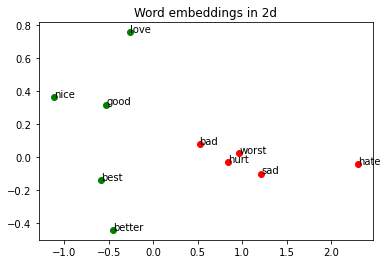

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

#Selection of negative and positive words
neg_words = ['worst', 'bad', 'hurt', 'sad', 'hate']
pos_words = ['best', 'good', 'nice', 'better', 'love']

#Index of each selected word
neg_n = [Vocab[w] for w in neg_words]
pos_n = [Vocab[w] for w in pos_words]

plt.figure()

#Scatter plot for negative words
plt.scatter(emb_2dim[neg_n][:,0],emb_2dim[neg_n][:,1], color = 'r')
for i, txt in enumerate(neg_words): 
    plt.annotate(txt, (emb_2dim[neg_n][i,0],emb_2dim[neg_n][i,1]))

#Scatter plot for positive words
plt.scatter(emb_2dim[pos_n][:,0],emb_2dim[pos_n][:,1], color = 'g')
for i, txt in enumerate(pos_words): 
    plt.annotate(txt,(emb_2dim[pos_n][i,0],emb_2dim[pos_n][i,1]))

plt.title('Word embeddings in 2d')

plt.show()